# 《深度学习框架Tensorflow学习与应用》笔记

## 第一课
这节课主要介绍了下TensorFlow、Annacoda的安装

## 第二课

### 创建图、启动图

In [5]:
import tensorflow as tf

In [6]:
#创建一个常量op
m1 = tf.constant([[3,3]])
## 创建一个常量op
m2 = tf.constant([[2],[3]])
#创建一个矩阵乘法op，吧m1和 m2 传入
product = tf.matmul(m1,m2)
print(product)

Tensor("MatMul_2:0", shape=(1, 1), dtype=int32)


注意：这里只是定义了一些operation，并没有放到会话里边的图中进行执行！

In [7]:
# 定义了一个会话，启动默认图
sess = tf.Session()
## 调用session的 run 方法来执行矩阵乘法op
## run(product)触发了图中的3个op
result = sess.run(product)
print(result)
sess.close()

[[15]]


这样，会话才开始执行，首先执行矩阵乘法，然后再上一层生成两个常量，它就是一层一层的往上调用！  
最后要把会话关闭！！

In [8]:
with tf.Session() as sess:
    # 结束时会自动关闭session
    result = sess.run(product)
    print(result)

[[15]]


用了这个with语句，我们就不需要关闭会话了。

### 变量

In [9]:
import tensorflow as tf

In [10]:
x = tf.Variable([1,2])
a = tf.constant([3,3])

sub = tf.subtract(x,a)
add = tf.add(x,sub)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(sub))
    print(sess.run(add))

[-2 -1]
[-1  1]


注意：变量Variable()需要初始化！

**变量的自加：**

In [8]:
## 创建一个变量初始为0
state = tf.Variable(0,name='counter')
## 创建一个op，作用是使state+1
new_state = tf.add(state,1)
## 赋值op
update = tf.assign(state,new_state)
## 变量初始化
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(state))
    for _ in range(5):
        sess.run(update)
        print(sess.run(state))

0
1
2
3
4
5


### Fetch&Feed

In [9]:
import tensorflow as  tf

#### Fetch: 我们可以在会话中同时运行多个op

In [10]:
## fetch
input1 =tf.constant(3.0)
input2= tf.constant(2.0)
input3 = tf.constant(5.0)

add = tf.add(input2,input3)
mul = tf.multiply(input1,add)

with tf.Session() as sess:
    result = sess.run([mul,add])
    print(result)

[21.0, 7.0]


#### Feed

In [11]:
# Feed
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1,input2)

with tf.Session() as sess:
    ## feed 的数据以字典的形式传入
    print(sess.run(output,feed_dict={input1:[8.],input2:[2.]}))

[16.]


### TensorFlow简单演示

In [13]:
import tensorflow as tf
import numpy as np

In [14]:
## 使用numpy生成100个随机点
x_data = np.random.rand(100)
y_data = x_data*0.1+0.2

#构建一个线性模型
b = tf.Variable(0.)
k = tf.Variable(0.)
y = k*x_data+b
## 损失函数
loss = tf.reduce_mean(tf.square(y_data-y))
optimizer = tf.train.GradientDescentOptimizer(0.2)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(201):
        sess.run(train)
        if step %20 == 0:
            print(step,sess.run([k,b]))

0 [0.060734015, 0.102564335]
20 [0.10898718, 0.19464187]
40 [0.105815746, 0.1965327]
60 [0.10376346, 0.19775626]
80 [0.10243539, 0.19854805]
100 [0.101575986, 0.19906041]
120 [0.10101985, 0.19939198]
140 [0.10065995, 0.19960654]
160 [0.100427054, 0.19974539]
180 [0.10027636, 0.19983524]
200 [0.10017883, 0.19989339]


## 第三课

### 线性回归（这里其实是非线性回归）

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

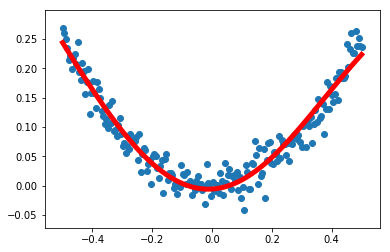

In [4]:
## 使用numpy生成200个随机点
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise =np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

## 定义两个placeholder
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

## 定义神经网络中间层
Weights_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

## 定义神经网络输出层
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

## 二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
## 使用梯度下降法训练
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
        
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()

### MNIST数据分类简单版本

In [14]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
## 载入数据集
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)
## 每个批次的大小
batch_size =100
## 计算一共有多少个批次
n_batch = mnist.train.num_examples // batch_size
## 定义两个placeholder
x=tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

## 创建一个简单的神经网络
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
prediction = tf.nn.softmax(tf.matmul(x,W)+b)

## 二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
## 使用梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)
## 初始化变量
init = tf.global_variables_initializer()
## 结果存放在一个布尔型列表中
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1)) ## argmax 返回一维张量中最大的值所在的位置
## 求准确率
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(21):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys})
        
        acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print ("Iter" + str(epoch)+" ,Testing Accuracy" +str(acc))

这里的tf.argmax()返回最大值所在的位置（索引），因为这里y、prediction都是one-hot标签（y为9个0，一个1；prediction为10个0-1之间的概率），所以返回的就是真实值和预测值的索引，如果一样说明预测正确！  
注意：返回得到的值为布尔型的列表，这里需要把布尔型的列表转化为浮点型，然后求平均值。


## 第四课

### 交叉熵

In [16]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [17]:
## 载入数据集
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)
## 每个批次的大小
batch_size =100
## 计算一共有多少个批次
n_batch = mnist.train.num_examples // batch_size
## 定义两个placeholder
x=tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

## 创建一个简单的神经网络
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
prediction = tf.nn.softmax(tf.matmul(x,W)+b)

## 二次代价函数
# loss = tf.reduce_mean(tf.square(y-prediction))
## 交叉熵
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y, logits = prediction))
## 使用梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)
## 初始化变量
init = tf.global_variables_initializer()
## 结果存放在一个布尔型列表中
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1)) ## argmax 返回一维张量中最大的值所在的位置
## 求准确率
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(21):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys})
        
        acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print ("Iter" + str(epoch)+" ,Testing Accuracy" +str(acc))

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

**注意：交叉熵这里需要求一个平均值**  

损失函数采用交叉熵将会加快训练速度（相比于二次代价函数）,这里只迭代了3次就达到了90%的正确率，而二次代价函数这里需要迭代7次。

### Dropout

In [18]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [20]:
## 载入数据集
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

## 每个批次的大小
batch_size =100
## 计算一共有多少个批次

n_batch = mnist.train.num_examples // batch_size
## 定义两个placeholder
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])
keep_prob = tf.placeholder(tf.float32)

## 创建一个简单的神经网络
W1 = tf.Variable(tf.truncated_normal([784,200],stddev=0.1))
b1 = tf.Variable(tf.zeros([200])+0.1)
L1 = tf.nn.tanh(tf.matmul(x,W1)+b1)
L1_drop = tf.nn.dropout(L1,keep_prob=keep_prob)

W2 = tf.Variable(tf.truncated_normal([200,200],stddev=0.1))
b2 = tf.Variable(tf.zeros([200])+0.1)
L2 = tf.nn.tanh(tf.matmul(L1_drop,W2)+b2)
L2_drop = tf.nn.dropout(L2,keep_prob=keep_prob)

W3 = tf.Variable(tf.truncated_normal([200,100],stddev=0.1))
b3 = tf.Variable(tf.zeros([100])+0.1)
L3 = tf.nn.tanh(tf.matmul(L2_drop,W3)+b3)
L3_drop = tf.nn.dropout(L3,keep_prob=keep_prob)

W4 = tf.Variable(tf.truncated_normal([100,10],stddev=0.1))
b4 = tf.Variable(tf.zeros([10])+0.1)
prediction = tf.nn.tanh(tf.matmul(L3_drop,W4)+b4)


## 交叉熵
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y, logits = prediction))
## 使用梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)
## 初始化变量
init = tf.global_variables_initializer()
## 结果存放在一个布尔型列表中
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1)) ## argmax 返回一维张量中最大的值所在的位置
## 求准确率
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(21):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            ## 注意 只有训练的时候能 进行dropOut,测试时候不能使用dropout
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys,keep_prob:1.0})
        
        ## 下面是 测试, keep_prob 必须为1
        test_acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels,keep_prob:1.0})
        train_acc = sess.run(accuracy,feed_dict={x:mnist.train.images,y:mnist.train.labels,keep_prob:1.0})
        print ("Iter" + str(epoch)+" ,Testing Accuracy" +str(test_acc)+" ,Training Accuracy" +str(train_acc))

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Iter0 ,Testing Accuracy0.9331 ,Training Accuracy0.9335273
Iter1 ,Testing Accuracy0.9495 ,Training Accuracy0.9535273
Iter2 ,Testing Accuracy0.9568 ,Training Accuracy0.96265453
Iter3 ,Testing Accuracy0.9608 ,Training Accura

#### 问题1
**注意：这里初始化和之前不同，因为多层神经网络采用全0初始化会有问题，所以采用tf.truncated_normal()函数（截断的正态分布中输出随机值）**  

tf.truncated_normal(): 生成的值服从具有指定平均值和标准偏差的正态分布，如果生成的值大于平均值2个标准偏差的值则丢弃重新选择。

#### 问题2
这里故意选了很多层的神经网络，为了过拟合，这样之后可以看到dropout的作用  
- 第一次（keep_prop = 1.0）：没有dropout，可以看出训练集的正确率达到99.5%，测试集的正确率达到97%  
- 第二次（keep_prop = 0.7）：训练时70%的神经元工作，**测试时所有的神经元工作！！**这里可以看到模型的收敛速度变慢了，同时训练集、测试集的正确率基本一致，说明没有过拟合。

### 优化器

#### 训练速度
SGD优化器训练的速度慢，Momentum、NAG（“聪明”的Momentum）优化的路径会有错误，但是速度很快

#### 鞍点问题
SGD优化器没有办法从鞍点逃离，别的优化器都可以逃离

但是训练速度并不是衡量优劣的标准，一般来说准确率才是关键，所以SGD优化器还是继续在使用，在创建一个新的神经网络的时候，可以采用速度最快的优化器进行训练，然后训练了差不多的时候，把所有的优化器都试一遍，找到准确率最高的优化器。

#### 代码

In [8]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [10]:
## 载入数据集
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)
## 每个批次的大小
batch_size =100
## 计算一共有多少个批次
n_batch = mnist.train.num_examples // batch_size
## 定义两个placeholder
x=tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

## 创建一个简单的神经网络
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
prediction = tf.nn.softmax(tf.matmul(x,W)+b)

## 二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
## 使用梯度下降法
# train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)
## 一般在使用 AdamOptimizer 的learning rate 都比较小,1e-5,1e-6
train_step = tf.train.AdamOptimizer(1e-6).minimize(loss)



## 初始化变量
init = tf.global_variables_initializer()
## 结果存放在一个布尔型列表中
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1)) ## argmax 返回一维张量中最大的值所在的位置
## 求准确率
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(21):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys})
        
        acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print ("Iter" + str(epoch)+" ,Testing Accuracy" +str(acc))

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Iter0 ,Testing Accuracy0.6533
Iter1 ,Testing Accuracy0.6604
Iter2 ,Testing Accuracy0.6662
Iter3 ,Testing Accuracy0.6718
Iter4 ,Testing Accuracy0.6756
Iter5 ,Testing Accuracy0.678
Iter6 ,Testing Accuracy0.6805
Iter7 ,Testing Accuracy0.6829
Iter8 ,Testing Accuracy0.6854
Iter9 ,Testing Accuracy0.6895
Iter10 ,Testing Accuracy0.6913
Iter11 ,Testing Accuracy0.6915
Iter12 ,Testing Accuracy0.6925
Iter13 ,Testing Accuracy0.695
Iter14 ,Testing Accuracy0.6966
Iter15 ,Testing Accuracy0.6977
Iter16 ,Testing Accuracy0.6987
Iter17 ,Testing Accuracy0.7
Iter18 ,Testing Accuracy0.7018
Iter19 ,Testing Accuracy0.7039
Iter20 ,Testing Accuracy0.7056


一般Adam优化器的学习率都比较小

### 第四周作业

In [11]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

## 载入数据集
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

## 每个批次的大小
batch_size =100
## 计算一共有多少个批次

n_batch = mnist.train.num_examples // batch_size
## 定义两个placeholder
x=tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])
keep_prob = tf.placeholder(tf.float32)
lr = tf.Variable(0.001,dtype=tf.float32)

## 创建一个简单的神经网络
W1 = tf.Variable(tf.truncated_normal([784,500],stddev=0.1))
b1 = tf.Variable(tf.zeros([500])+0.1)
L1 = tf.nn.tanh(tf.matmul(x,W1)+b1)
L1_drop = tf.nn.dropout(L1,keep_prob=keep_prob)

W2 = tf.Variable(tf.truncated_normal([500,300],stddev=0.1))
b2 = tf.Variable(tf.zeros([300])+0.1)
L2 = tf.nn.tanh(tf.matmul(L1_drop,W2)+b2)
L2_drop = tf.nn.dropout(L2,keep_prob=keep_prob)


W3 = tf.Variable(tf.truncated_normal([300,10],stddev=0.1))
b3 = tf.Variable(tf.zeros([10])+0.1)
prediction = tf.nn.tanh(tf.matmul(L2_drop,W3)+b3)


## 交叉熵
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=prediction))

train_step = tf.train.AdamOptimizer(lr).minimize(loss)

init = tf.global_variables_initializer()

correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1)) ## argmax 返回一维张量中最大的值所在的位置

accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(51):
        ## 使得学习率随着收敛逐步缩小,刚开始很大,快速收敛,靠近最小值时,使得慢慢靠近,使得到达最低点
        sess.run(tf.assign(lr,0.001*(0.95**epoch)))
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys,keep_prob:1.0})
        
        learning_rate = sess.run(lr)
        test_acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels,keep_prob:1.0})
        print ("Iter" + str(epoch)+" ,Testing Accuracy" +str(test_acc)+"learning rate ="+str(learning_rate))


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Iter0 ,Testing Accuracy0.9582learning rate =0.001
Iter1 ,Testing Accuracy0.9641learning rate =0.00095
Iter2 ,Testing Accuracy0.9711learning rate =0.0009025
Iter3 ,Testing Accuracy0.9756learning rate =0.000857375
Iter4 ,Testing Accuracy0.977learning rate =0.00081450626
Iter5 ,Testing Accuracy0.9784learning rate =0.0007737809
Iter6 ,Testing Accuracy0.9764learning rate =0.0007350919
Iter7 ,Testing Accuracy0.9773learning rate =0.0006983373
Iter8 ,Testing Accuracy0.9794learning rate =0.0006634204
Iter9 ,Testing Accuracy0.9781learning rate =0.0006302494
Iter10 ,Testing Accuracy0.9803learning rate =0.0005987369
Iter11 ,Testing Accuracy0.9813learning rate =0.0005688001
Iter12 ,Testing Accuracy0.9809learning rate =0.0005403601
Iter13 ,Testing Accuracy0.9798learning rate =0.0005133421
Iter14 ,Testing Accu

- 因为手写数字识别数据集的数据并不多，所以这里不使用dropout。  
- 采用Adam优化器加快收敛  
- 采用合适的epoch次数，这里刚开始是比较大的学习率，然后慢慢降低学习率

## 第五课
TensorBoard使用教程

### TensorBoard网络结构
由于这里看的是网络的结构，所以只需要迭代一次就可以

#### 保存路径
writer = tf.summary.FileWriter('logs/',sess.graph)  
注意盘符，必须要移动到跟文件所在位置一样的盘符

**问题：在浏览器输入这个链接(localhost:6006)的时候却不能找到程序生成的数据流图，而我在文件系统下在该文件夹里却能正常找到文件** 

解决办法：一路cd到训练数据所在文件夹，如果在其他磁盘，先转到所在盘，再cd到所在文件夹，然后打开cmd，输入：**tensorboard --logdir = ./**

#### graph的缓存清除
每次执行之后，graph都会保存在内存中，可以通过restart kernel来解决。

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data


mnist = input_data.read_data_sets('MNIST_data',one_hot=True)


batch_size =100
n_batch = mnist.train.num_examples // batch_size

## 命名空间 
with tf.name_scope("input"):
    x=tf.placeholder(tf.float32,[None,784],name="x-input")
    y = tf.placeholder(tf.float32,[None,10],name="y-input")

with tf.name_scope('layer'):
    with tf.name_scope('weights'):
        W = tf.Variable(tf.zeros([784,10]))
    with tf.name_scope('biases'):
        b = tf.Variable(tf.zeros([10]))
    with tf.name_scope('wx_plus_b'):
        wx_plus_b = tf.matmul(x,W)+b
    with tf.name_scope('softmax'):
        prediction = tf.nn.softmax(wx_plus_b)

with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=prediction))
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

init = tf.global_variables_initializer()

with tf.name_scope('accuracy'):
    with tf.name_scope('correct_prediction'):
        correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1)) ## argmax 返回一维张量中最大的值所在的位置
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

## 下面和网络结构没有关系,只有上面的和 网络结构有关系
## 注意重新启动 jupyter 以及 删除 原来的log 目录
## windows 输入 logdir要进入相应的磁盘 ,输入全路径\
with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter('logs/',sess.graph)
    for epoch in range(1):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys})
        
        acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print ("Iter" + str(epoch)+" ,Testing Accuracy" +str(acc))

c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Iter0 ,Testing Accuracy0.8242


### TensorBoard网络运行

#### 参数概要
tf.summary.scalar('mean',mean)

#### 合并所有的summary
merged = tf.summary.merge_all()

#### 写入文件
writer.add_summary(summary,epoch)

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data


mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

batch_size =100
n_batch = mnist.train.num_examples // batch_size

##参数概要
def variable_summaries(var):
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean',mean) # 平均值
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var-mean)))
        tf.summary.scalar('stddev',stddev)
        tf.summary.scalar('max',tf.reduce_max(var))
        tf.summary.scalar('min',tf.reduce_min(var))
        tf.summary.histogram('histgram',var) # 直方图

with tf.name_scope("input"):
    x=tf.placeholder(tf.float32,[None,784],name="x-input")
    y = tf.placeholder(tf.float32,[None,10],name="y-input")

with tf.name_scope('layer'):
    with tf.name_scope('weights'):
        W = tf.Variable(tf.zeros([784,10]))
        variable_summaries(W) # 分析w
    with tf.name_scope('biases'):
        b = tf.Variable(tf.zeros([10]))
        variable_summaries(b) # 分析b
    with tf.name_scope('wx_plus_b'):
        wx_plus_b = tf.matmul(x,W)+b
    with tf.name_scope('softmax'):
        prediction = tf.nn.softmax(wx_plus_b)

## 如果loss 曲线震荡太大,可能学习率设置太大了
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=prediction))
    tf.summary.scalar('loss',loss)
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

init = tf.global_variables_initializer()

with tf.name_scope('accuracy'):
    with tf.name_scope('correct_prediction'):
        correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1)) ## argmax 返回一维张量中最大的值所在的位置
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
        tf.summary.scalar('accuracy',accuracy)
        
## 合并所有的 summary
merged = tf.summary.merge_all()

## 下面和网络结构没有关系,只有上面的和 网络结构有关系
with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter('logs/',sess.graph)
    for epoch in range(30):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            summary,_=sess.run([merged,train_step],feed_dict={x:batch_xs,y:batch_ys})
        
        ## 所有样本运行一个周期 之后再次打个点    
        writer.add_summary(summary,epoch)
        acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print ("Iter" + str(epoch)+" ,Testing Accuracy" +str(acc))

c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Iter0 ,Testing Accuracy0.8479
Iter1 ,Testing Accuracy0.8969
Iter2 ,Testing Accuracy0.902
Iter3 ,Testing Accuracy0.9059
Iter4 ,Testing Accuracy0.9082
Iter5 ,Testing Accuracy0.9096
Iter6 ,Testing Accuracy0.9124
Iter7 ,Testing Accuracy0.9139
Iter8 ,Testing Accuracy0.9145
Iter9 ,Testing Accuracy0.9164
Iter10 ,Testing Accuracy0.9167
Iter11 ,Testing Accuracy0.9178
Iter12 ,Testing Accuracy0.9192
Iter13 ,Testing Accuracy0.9192
Iter14 ,Testing Accuracy0.9206
Iter15 ,Testing Accuracy0.92
Iter16 ,Testing Accuracy0.9205
Iter17 ,Testing Accuracy0.9206
Iter18 ,Testing Accuracy0.9216
Iter19 ,Testing Accuracy0.9211
Iter20 ,Testing Accuracy0.9217
Iter21 ,Testing Accuracy0.9216
Iter22 ,Testing Accuracy0.9224
Iter23 ,Testing Accuracy0.9216
Iter24 ,Testing Accuracy0.9224
Iter25 ,Testing Accuracy0.923
Iter26 ,Testin

TensorBoard结果可以看出：  

1.scaler  
- 正确率开始慢慢增加，然后基本不再增加  
- weights、biases的最小值、最大值、平均值的变化
- loss在慢慢减小，如果没有很大的振荡就说明学习率设置的还可以，没有不收敛的现象  

![5-01](https://github.com/dta0502/DeepLearning-Framework-TensorFlow-Learning-and-Application/blob/master/Notebook%20images/5-01.PNG)

2.distribution  
weights、biases的分布，颜色越深、分布越多  

![5-02](https://github.com/dta0502/DeepLearning-Framework-TensorFlow-Learning-and-Application/blob/master/Notebook%20images/5-02.PNG)

3.histogram  
weights、biases的分布随着训练次数的变化而变化  

![5-03](https://github.com/dta0502/DeepLearning-Framework-TensorFlow-Learning-and-Application/blob/master/Notebook%20images/5-03.PNG)



### TensorBoard可视化

#### TensorFlow官网上的例子

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data  
from tensorflow.contrib.tensorboard.plugins import projector

mnist = input_data.read_data_sets('MNIST_data',one_hot=True)
# 运行次数
max_steps = 1001
## 图片数量
image_num = 3000
#文件路进
DIR ='D://document/Dropbox/document/Python/DeepLearning Framework TensorFlow Learning and Application/'
# 定义绘会话
sess = tf.Session()

#载入图片
embedding = tf.Variable(tf.stack(mnist.test.images[:image_num]),trainable=False,name='embedding')


##参数概要
def variable_summaries(var):
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean',mean) # 平均值
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var-mean)))
        tf.summary.scalar('stddev',stddev)
        tf.summary.scalar('max',tf.reduce_max(var))
        tf.summary.scalar('min',tf.reduce_min(var))
        tf.summary.histogram('histgram',var) # 直方图

## 命名空间
with tf.name_scope("input"):
    x=tf.placeholder(tf.float32,[None,784],name="x-input")
    y = tf.placeholder(tf.float32,[None,10],name="y-input")


# 显示图皮那
with tf.name_scope("input_reshape"):
    # -1 表示任意值,原来一张图片是一行1x784,现在百纳成28x28,channel=1因为是黑白图片
    image_shaped_input = tf.reshape(x,[-1,28,28,1])
    tf.summary.image("input",image_shaped_input,10)

with tf.name_scope('layer'):
    with tf.name_scope('weights'):
        W = tf.Variable(tf.zeros([784,10]))
        variable_summaries(W) ## 分析w
    with tf.name_scope('biases'):
        b = tf.Variable(tf.zeros([10]))
        variable_summaries(b) # 分析b
    with tf.name_scope('wx_plus_b'):
        wx_plus_b = tf.matmul(x,W)+b
    with tf.name_scope('softmax'):
        prediction = tf.nn.softmax(wx_plus_b)
    
    
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=prediction))
    tf.summary.scalar('loss',loss)
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)


sess.run(tf.global_variables_initializer())

with tf.name_scope('accuracy'):
    with tf.name_scope('correct_prediction'):
        correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1)) ## argmax 返回一维张量中最大的值所在的位置
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
        tf.summary.scalar('accuracy',accuracy)
        
## 生成metadata 文件
if tf.gfile.Exists(DIR+'projector/projector/metadata.tsv'):
    tf.gfile.DeleteRecursively(DIR+'projector/projector/metadata.tsv')
with open(DIR+'projector/projector/metadata.tsv','w+') as f:
    labels = sess.run(tf.argmax(mnist.test.labels[:],1))
    for  i in range(image_num):
        f.write(str(labels[i])+'\n')


merged = tf.summary.merge_all()

projector_writer = tf.summary.FileWriter(DIR+'projector/projector',sess.graph)
saver = tf.train.Saver()
config = projector.ProjectorConfig()
embed = config.embeddings.add()
embed.tensor_name = embedding.name
embed.metadata_path = DIR+'projector/projector/metadata.tsv'
embed.sprite.image_path = DIR +'projector/data/mnist_10k_sprite.png'
embed.sprite.single_image_dim.extend([28,28])
projector.visualize_embeddings(projector_writer,config)

for i in range(max_steps):
    ## 每个批次 100个 样本
    batch_xs,batch_ys = mnist.train.next_batch(100)
    run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
    run_metadata = tf.RunMetadata()
    summary,_=sess.run([merged,train_step],feed_dict={x:batch_xs,y:batch_ys},options=run_options,run_metadata=run_metadata)
    projector_writer.add_run_metadata(run_metadata,'step%03d'%i)
    projector_writer.add_summary(summary,i)
    
    if i%100 == 0:  
        acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print ("Iter" + str(i)+" ,Testing Accuracy" +str(acc))

saver.save(sess,DIR+'projector/projector/a_model.ckpt',global_step=max_steps)
projector_writer.close()
sess.close()

c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Iter0 ,Testing Accuracy0.1413
Iter100 ,Testing Accuracy0.7128
Iter200 ,Testing Accuracy0.7337
Iter300 ,Testing Accuracy0.7426
Iter400 ,Testing Accuracy0.7686
Iter500 ,Testing Accuracy0.8223
Iter600 ,Testing Accuracy0.8272
Iter700 ,Testing Accuracy0.8574
Iter800 ,Testing Accuracy0.8732
Iter900 ,Testing Accuracy0.8855
Iter1000 ,Testing Accuracy0.8899


#### TensorBoard结果  
1.scaler  

![5-11](https://github.com/dta0502/DeepLearning-Framework-TensorFlow-Learning-and-Application/blob/master/Notebook%20images/5-11.PNG)

![5-12](https://github.com/dta0502/DeepLearning-Framework-TensorFlow-Learning-and-Application/blob/master/Notebook%20images/5-12.PNG)

这些都和之前那个差不多

2.projector  
- 可以选择color，给每个标签不同的颜色   
- 刚开始标签都是混乱的，然后点击T-SNE开始训练，可以看出，图片随着迭代次数的增加开始聚类  

## 第六课

### 卷积神经网络

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data 

In [3]:
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)


batch_size =100
n_batch = mnist.train.num_examples // batch_size

##初始化权值
def weight_variable(shape):
    initial= tf.truncated_normal(shape,stddev=0.1) #生成一个阶段的正太分布
    return tf.Variable(initial)
## 初始化偏置
def bias_variable(shape):
    initial = tf.constant(0.1,shape=shape)
    return tf.Variable(initial)
## 卷积层
def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')
## 池化层
def max_pool_2x2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

x=tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

##改变x的格式转变为4D的向量 [batch,in_height,in_weight,in_channel]
x_image = tf.reshape(x,[-1,28,28,1])

##初始化第一个卷积层的权重和偏置
W_conv1 = weight_variable([5,5,1,32]) ## 5x5的采样窗口,32个卷积核从1个平面抽取特征
b_conv1 = bias_variable([32]) ##每一个卷积核一个偏执量

##把x_image 和权值向量进行卷积,再加上偏置量,然后应用于relu 激活函数
h_conv1 = tf.nn.relu(conv2d(x_image,W_conv1)+b_conv1)
h_pool1 = max_pool_2x2(h_conv1) ##进行max_pooling

## 初始化第二个卷积层的权重和偏置
W_conv2 = weight_variable([5,5,32,64]) ## 5x5的采样窗口,64个卷积核从32个平面抽取特征
b_conv2 = bias_variable([64]) ##每一个卷积核一个偏执量

##把h_pool1 和权值向量进行卷积,再加上偏置量,然后应用于relu 激活函数
h_conv2 = tf.nn.relu(conv2d(h_pool1,W_conv2)+b_conv2)
h_pool2 = max_pool_2x2(h_conv2) ##进行max_pooling

## 28x28 的图片第一次 卷积 后还是28x28,第一次池化后变成 14x14
## 第二次 卷积后 为 14x14,第二次池化后 成了7x7
# 通过上面操作后得到 64张7x7的平面

## 初始化第一个全连接层的权值
W_fc1 = weight_variable([7*7*64,1024]) # 上一层有了7*7*64个神经元,全连接层有了1024个神经元
b_fc1 = bias_variable([1024]) ## 1024个节点

## 把吃话曾2的输出扁平化为1维
h_pool2_flat = tf.reshape(h_pool2,[-1,7*7*64])
## 求第一个全连接层的输出
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat,W_fc1)+b_fc1)

## keep_prob 用来表示 神经元 的输出概率
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1,keep_prob)

## 初始化第二个全连接层
W_fc2 = weight_variable([1024,10])
b_fc2 = bias_variable([10])

## 计算输出
prediction = tf.nn.softmax(tf.matmul(h_fc1_drop,W_fc2)+b_fc2)

## 交叉熵代价函数
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=prediction))
## 使用 AdamOptimizer进行优化
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
## 结果存放在一个布尔列表中
correct_prediction = tf.equal(tf.argmax(prediction,1),tf.argmax(y,1)) ## argmax返回一维张量中最大的值所在的位置
## 求准确率
accuracy= tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(21):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys,keep_prob:0.7})
        acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels,keep_prob:1.0})
        print ("Iter" + str(epoch)+" ,Testing Accuracy" +str(acc))

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



KeyboardInterrupt: 

### 第六周作业

In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data 

mnist = input_data.read_data_sets('MNIST_data',one_hot=True)


batch_size =100
n_batch = mnist.train.num_examples // batch_size

##参数概要
def variable_summaries(var):
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean',mean) # 平均值
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var-mean)))
        tf.summary.scalar('stddev',stddev)
        tf.summary.scalar('max',tf.reduce_max(var))
        tf.summary.scalar('min',tf.reduce_min(var))
        tf.summary.histogram('histgram',var) # 直方图
        
        
##初始化权值
def weight_variable(shape,name):
    initial= tf.truncated_normal(shape,stddev=0.1) #生成一个阶段的正太分布
    return tf.Variable(initial,name=name)

## 初始化偏置
def bias_variable(shape,name):
    initial = tf.constant(0.1,shape=shape)
    return tf.Variable(initial,name=name)

## 卷积层
def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

## 池化层
def max_pool_2x2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

with tf.name_scope('input'):
    x=tf.placeholder(tf.float32,[None,784],name='x-input')
    y = tf.placeholder(tf.float32,[None,10],name='y-input')
    with tf.name_scope('x_image'):
        x_image = tf.reshape(x,[-1,28,28,1],name='x_image')


with tf.name_scope('Conv1'):
    with tf.name_scope('W_conv1'):
        W_conv1 = weight_variable([5,5,1,32],name='W_conv1')
    with tf.name_scope('b_conv1'):
        b_conv1 = bias_variable([32],name='b_conv1')
    with tf.name_scope('conv2d_1'):
        conv2d_1 =conv2d(x_image,W_conv1)+b_conv1
    with tf.name_scope('h_conv1'):
        h_conv1 = tf.nn.relu(conv2d_1)
    with tf.name_scope('h_pool1'):
        h_pool1 = max_pool_2x2(h_conv1) 


with tf.name_scope('Conv2'):
    with tf.name_scope('W_conv2'):
        W_conv2 = weight_variable([5,5,32,64],name='W_conv2') 
    with tf.name_scope('b_conv2'):
        b_conv2 = bias_variable([64],name='b_conv2') 
    with tf.name_scope('conv2d_2'):
        conv2d_2 =conv2d(h_pool1,W_conv2)+b_conv2
    with tf.name_scope('h_conv2'):
        h_conv2 = tf.nn.relu(conv2d_2)
    with tf.name_scope('h_pool2'):
        h_pool2 = max_pool_2x2(h_conv2) 
        
        
## 28x28 的图片第一次 卷积 后还是28x28,第一次池化后变成 14x14
## 第二次 卷积后 为 14x14,第二次池化后 成了7x7
# 通过上面操作后得到 64张7x7的平面

with tf.name_scope('fc1'):
    with tf.name_scope('W_fc1'):
        W_fc1 = weight_variable([7*7*64,1024],name='W_fc1') 
    with tf.name_scope('b_fc1'):
        b_fc1 = bias_variable([1024],name='b_fc1')
    with tf.name_scope('h_pool2_flat'):
        h_pool2_flat = tf.reshape(h_pool2,[-1,7*7*64])
    with tf.name_scope('wx_plus_b1'):
        wx_plus_b1 = tf.matmul(h_pool2_flat,W_fc1)+b_fc1
    with tf.name_scope('rule'):
        h_fc1 = tf.nn.relu(wx_plus_b1)

    with tf.name_scope('keep_prob'):
        keep_prob = tf.placeholder(tf.float32,name='keep_prob')
    with tf.name_scope('h_fc1_drop'):
        h_fc1_drop = tf.nn.dropout(h_fc1,keep_prob,name='h_fc1_drop')


with tf.name_scope('fc2'):
    with tf.name_scope('W_fc2'):
        W_fc2 = weight_variable([1024,10],name='W_fc2')
    with tf.name_scope('b_fc2'):
        b_fc2 = bias_variable([10],name='b_fc2')
    with tf.name_scope('wx_plus_b2'):
        wx_plus_b2 = tf.matmul(h_fc1_drop,W_fc2)+b_fc2
    with tf.name_scope('softmax'):
        prediction = tf.nn.softmax(wx_plus_b2)


## 交叉熵代价函数
with tf.name_scope('cross_entropy'):
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=prediction))
    tf.summary.scalar('cross_entropy',cross_entropy)
with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

with tf.name_scope('accuray'):
    with tf.name_scope('correct_prediction'):
        correct_prediction = tf.equal(tf.argmax(prediction,1),tf.argmax(y,1)) ## argmax返回一维张量中最大的值所在的位置
    with tf.name_scope('accuracy'):
        accuracy= tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
        tf.summary.scalar('accuracy',accuracy)

merged = tf.summary.merge_all()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    train_writer = tf.summary.FileWriter('logs/train',sess.graph)
    test_writer = tf.summary.FileWriter('logs/test',sess.graph)
    for i in range(1001):
        # 训练模型
        batch_xs,batch_ys = mnist.train.next_batch(batch_size)
        sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys,keep_prob:0.5})
        ## 记录训练集 记录的参数
        summary = sess.run(merged,feed_dict={x:batch_xs,y:batch_ys,keep_prob:1.0})
        train_writer.add_summary(summary,i)
        ## 记录测量集 计算的参数
        batch_xs,batch_ys = mnist.test.next_batch(batch_size)
        summary = sess.run(merged,feed_dict={x:batch_xs,y:batch_ys,keep_prob:1.0})
        test_writer.add_summary(summary,i)
        
        if i%100 == 0:
            test_acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels,keep_prob:1.0})
            train_acc = sess.run(accuracy,feed_dict={x:mnist.train.images[:10000],y:mnist.train.labels[:10000],keep_prob:1.0})
            print ("Iter" + str(i)+" ,Testing Accuracy" +str(test_acc)+" ,Training Accuracy" +str(train_acc))
        

## 第七课
循环神经网络（略）

## 第八课

### Saver_save()

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
## 载入数据集
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)
## 每个批次的大小
batch_size =100
## 计算一共有多少个批次
n_batch = mnist.train.num_examples // batch_size
## 定义两个placeholder
x=tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

## 创建一个简单的神经网络
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
prediction = tf.nn.softmax(tf.matmul(x,W)+b)

## 二次代价函数
# loss = tf.reduce_mean(tf.square(y-prediction))
## 交叉熵
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y, logits = prediction))
## 使用梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

## 初始化变量
init = tf.global_variables_initializer()
## 结果存放在一个布尔型列表中
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1)) ## argmax 返回一维张量中最大的值所在的位置
## 求准确率
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(21):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys})
        
        acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print ("Iter" + str(epoch)+" ,Testing Accuracy" +str(acc))
        
    #保存模型
    saver.save(sess, 'net/my_net.ckpt')

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Iter0 ,Testing Accuracy0.8248
Iter1 ,Testing Accuracy0.8916
Iter2 ,Testing Accuracy0.9005
Iter3 ,Testing Accuracy0.9065
Iter4 ,Testing Accuracy0.9082
Iter5 ,Testing Accuracy0.9105
Iter6 ,Testing Accuracy0.9106
Iter7 ,Testing Accuracy0.9125
Iter8 ,Testing Accuracy0.9152
Iter9 ,Testing Accuracy0.9159
Iter10 ,Testing Accuracy0.9167
Iter11 ,Testing Accuracy0.9178
Iter12 ,Testing Accuracy0.9188
Iter13 ,Testing Accuracy0.9189
Iter14 ,Testing Accuracy0.9197
Iter15 ,Testing Accuracy0.9203
Iter16 ,Testing Accuracy0.9208
Iter17 ,Testing Accuracy0.9207
Iter18 ,Testing Accuracy0.9205
Iter19 ,Testing Accuracy0.9213
Iter20 ,Testing Accuracy0.9208


### Saver_restore()

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
## 载入数据集
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)
## 每个批次的大小
batch_size =100
## 计算一共有多少个批次
n_batch = mnist.train.num_examples // batch_size
## 定义两个placeholder
x=tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

## 创建一个简单的神经网络
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
prediction = tf.nn.softmax(tf.matmul(x,W)+b)

## 二次代价函数
# loss = tf.reduce_mean(tf.square(y-prediction))
## 交叉熵
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y, logits = prediction))
## 使用梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

## 初始化变量
init = tf.global_variables_initializer()
## 结果存放在一个布尔型列表中
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1)) ## argmax 返回一维张量中最大的值所在的位置
## 求准确率
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)     
    print(sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels}))
    saver.restore(sess, 'net/my_net.ckpt')
    print(sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels}))

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
0.098
INFO:tensorflow:Restoring parameters from net/my_net.ckpt
0.9208


**注意：运行这段程序的时候，需要restart kernel，如果之前运行过程序，就有可能报错**

### 下载Google图像识别网络inception-v3并查看结构

In [1]:
import tensorflow as tf
import os
import tarfile
import requests

c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# inception模型下载地址
inception_pretrain_model_url = 'http://download.tensorflow.org/models/image/imagenet/inception-2015-12-05.tgz'

# 模型存放地址
inception_pretrain_model_dir = "inception_model"
if not os.path.exists(inception_pretrain_model_dir):
    os.makedirs(inception_pretrain_model_dir)
    
# 获取文件名以及文件路径
filename = inception_pretrain_model_url.split('/')[-1]
filepath = os.path.join(inception_pretrain_model_dir, filename)

# 下载模型
if not os.path.exists(filepath):
    print("download:", filename)
    r = requests.get(inception_pretrain_model_url, stream = True)
    with open(filepath, 'wb') as f:
        for chunk in r.iter_content(chunk_size = 1024):
            if chunk:
                f.write(chunk)
print("finish:", filename)

# 解压文件
tarfile.open(filepath, "r:gz").extractall(inception_pretrain_model_dir)

# 模型结构存放文件
log_dir = 'inception_log'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)
    
# classify_image_graph_def.pb为google训练好的模型
inception_graph_def_file = os.path.join(inception_pretrain_model_dir, 'classify_image_graph_def.pb')
with tf.Session() as sess:
    # 创建一个图用来存放google训练好的模型
    with tf.gfile.FastGFile(inception_graph_def_file, 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        tf.import_graph_def(graph_def, name = '')
        
    # 保存图的结构
    writer = tf.summary.FileWriter(log_dir, sess.graph)
    writer.close()

finish: inception-2015-12-05.tgz


### 使用inception-v3做各种图像识别

#### imagenet_2012_challenge_label_map_proto.pbtxt
- target_class是指1000分类的类别编号  
- target_class_string是一个字符串编号，可以从human_label_map.txt中找到对应的编号，便可以看到这张图片的内容  

In [ ]:
import tensorflow as tf  
import os  
import numpy as np  
import re  
from PIL import Image  
import matplotlib.pyplot as plt  
  
class NodeLookup(object):  
    def __init__(self):  
        label_lookup_path = 'inception_model/imagenet_2012_challenge_label_map_proto.pbtxt'  
        uid_lookup_path = 'inception_model/imagenet_synset_to_human_label_map.txt'  
        self.node_lookup = self.load(label_lookup_path, uid_lookup_path)  
  
    def load(self, label_lookup_path, uid_lookup_path):  
        #加载分类字符串n ------ 对应分类名称的文件  
        proto_as_ascii_lines = tf.gfile.GFile(uid_lookup_path).readlines()  
        uid_to_human = {}  
        #一行一行读取数据  
        for line in proto_as_ascii_lines :  
            #去掉换行符  
            line = line.strip('\n')  
            #按照‘\t’分割  
            parsed_items = line.split('\t')  
            #获取分类编号和分类名称  
            uid = parsed_items[0]  
            human_string = parsed_items[1]  
            #保存编号字符串-----与分类名称映射关系  
            uid_to_human[uid] = human_string  
  
  
        #加载分类字符串n ----- 对应分类编号1-1000的文件  
        proto_as_ascii_lines = tf.gfile.GFile(label_lookup_path).readlines()  
        node_id_to_uid = {}  
        for line in proto_as_ascii_lines :  
            if line.startswith('  target_class:'):  
                #获取分类编号1-1000  
                target_class = int(line.split(': ')[1])  
            if line.startswith('  target_class_string:'):  
                #获取编号字符串n****  
                target_class_string = line.split(': ')[1]  
                #保存分类编号1-1000与编号字符串n****的映射关系  
                node_id_to_uid[target_class] = target_class_string[1:-2]  
  
  
        #建立分类编号1-1000对应分类名称的映射关系  
        node_id_to_name = {}  
        for key, val in node_id_to_uid.items():  
            #获取分类名称  
            name = uid_to_human[val]  
            #建立分类编号1-1000到分类名称的映射关系  
            node_id_to_name[key] = name  
        return node_id_to_name  
  
    #传入分类编号1-1000返回分类名称  
    def id_to_string(self, node_id):  
        if node_id not in self.node_lookup:  
            return ''  
        return self.node_lookup[node_id]  

# 创建一个图来存放google训练好的模型  #2 load graph  
with tf.gfile.FastGFile('inception_model/classify_image_graph_def.pb', 'rb') as f:  
    graph_def = tf.GraphDef()  
    graph_def.ParseFromString(f.read())  
    tf.import_graph_def(graph_def, name='')  
  
  
with tf.Session() as sess:  
    softmax_tensor = sess.graph.get_tensor_by_name('softmax:0')  
    #遍历目录  
    for root, dirs, files in os.walk('images/'):  
        for file in files:  
            #载入图片  
            image_data = tf.gfile.FastGFile(os.path.join(root,file), 'rb').read()  
            predictions = sess.run(softmax_tensor, {'DecodeJpeg/contents:0': image_data})#图片格式是jpg格式  
            predictions = np.squeeze(predictions)#把结果转为1维  
  
            #打印图片路径及名称  
            image_path = os.path.join(root,file)  
            print(image_path)  
            #显示图片  
            img = Image.open(image_path)  
            plt.imshow(img)  
            plt.axis('off')  
            plt.show()  
  
            #排序  
            top_k = predictions.argsort()[-5:][::-1]  
            node_lookup = NodeLookup()  
            for node_id in top_k:  
                #获取分类名称  
                human_string = node_lookup.id_to_string(node_id)  
                #获取该分类的置信度  
                score = predictions[node_id]  
                print('%s (score = %.5f)' % (human_string, score))  
            print()  

ERROR! Session/line number was not unique in database. History logging moved to new session 40


## 第九课

### TensorFlow-GPU
- cuda的安装  
- TensorFlow的GPU版本的安装

## 第十课
略